In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline


In [2]:
dataset = pd.read_csv('Customer_Churn_Modified.csv')
# Define feature columns (X) and target column (y)
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
def custom_train_test_split(X, y, test_size=0.2, stratify=None, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=stratify, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to print class proportions
def print_proportions(y):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    for val, count in zip(unique, counts):
        print(f"Class {val}: {count} ({count/total*100:.1f}%)")

print("\nTraining set proportions:")
print_proportions(y_train)
print("\nTest set proportions:")
print_proportions(y_test)


Training set proportions:
Class 0: 2124 (84.3%)
Class 1: 396 (15.7%)

Test set proportions:
Class 0: 531 (84.3%)
Class 1: 99 (15.7%)



SVM with linear kernel and SMOTE - Accuracy: 0.846031746031746
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       531
           1       0.51      0.87      0.64        99

    accuracy                           0.85       630
   macro avg       0.74      0.86      0.77       630
weighted avg       0.90      0.85      0.86       630



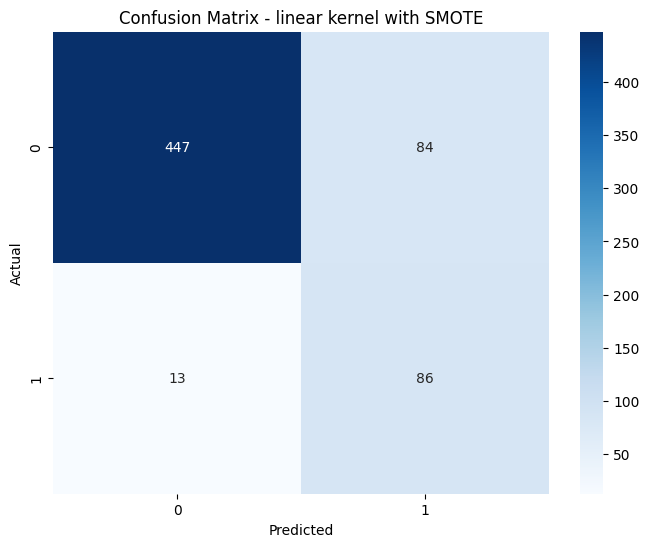


SVM with linear kernel and Random Undersampling - Accuracy: 0.846031746031746
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       531
           1       0.51      0.88      0.64        99

    accuracy                           0.85       630
   macro avg       0.74      0.86      0.77       630
weighted avg       0.90      0.85      0.86       630



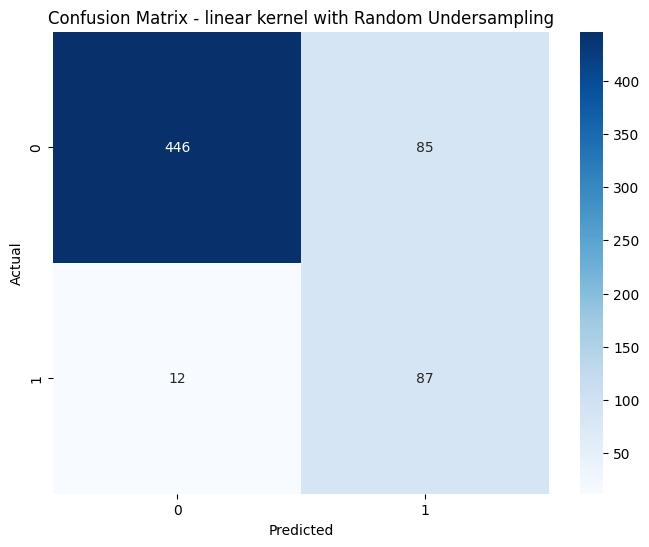


SVM with linear kernel and SMOTEENN - Accuracy: 0.8206349206349206
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       531
           1       0.46      0.88      0.61        99

    accuracy                           0.82       630
   macro avg       0.72      0.84      0.75       630
weighted avg       0.89      0.82      0.84       630



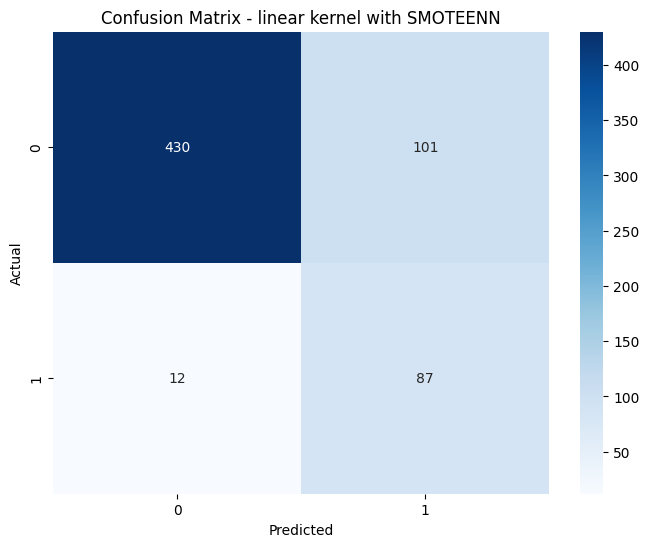


SVM with poly kernel and SMOTE - Accuracy: 0.9158730158730158
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       531
           1       0.66      0.97      0.78        99

    accuracy                           0.92       630
   macro avg       0.83      0.94      0.87       630
weighted avg       0.94      0.92      0.92       630



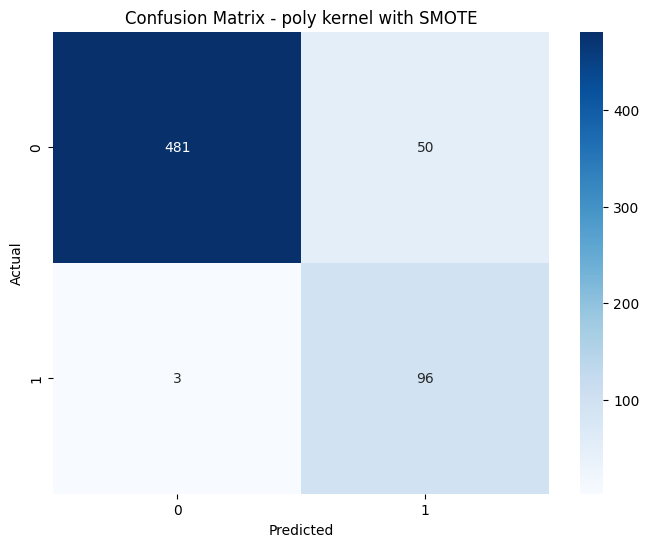


SVM with poly kernel and Random Undersampling - Accuracy: 0.8396825396825397
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       531
           1       0.49      0.97      0.66        99

    accuracy                           0.84       630
   macro avg       0.74      0.89      0.78       630
weighted avg       0.91      0.84      0.86       630



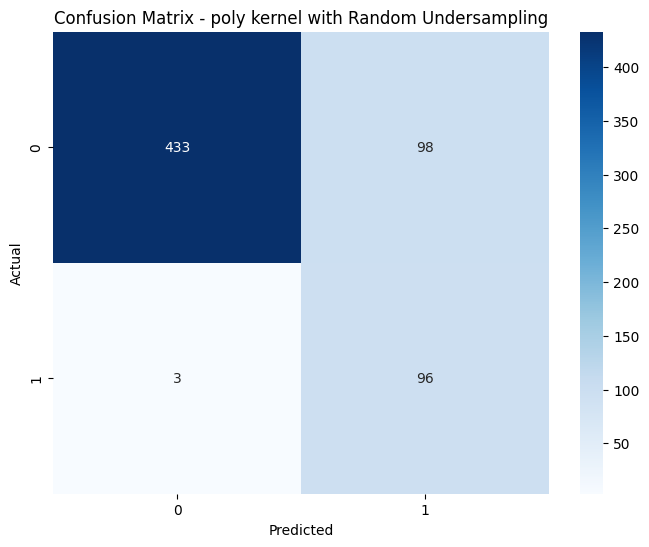


SVM with poly kernel and SMOTEENN - Accuracy: 0.8761904761904762
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       531
           1       0.56      0.97      0.71        99

    accuracy                           0.88       630
   macro avg       0.78      0.91      0.82       630
weighted avg       0.93      0.88      0.89       630



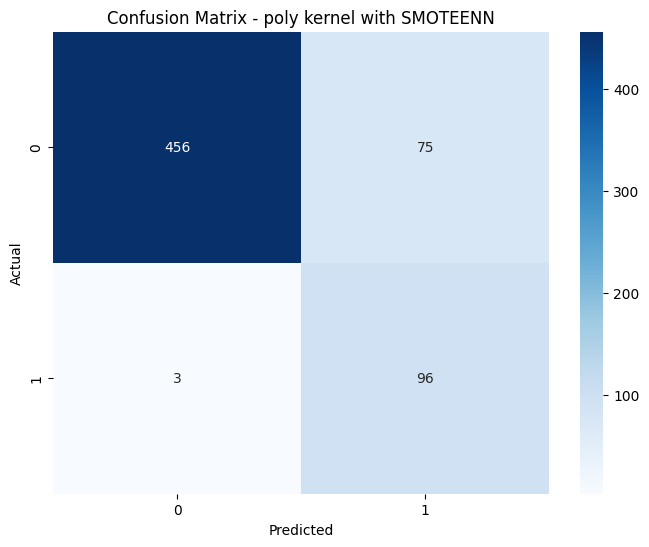


SVM with rbf kernel and SMOTE - Accuracy: 0.9634920634920635
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       531
           1       0.83      0.97      0.89        99

    accuracy                           0.96       630
   macro avg       0.91      0.97      0.94       630
weighted avg       0.97      0.96      0.96       630



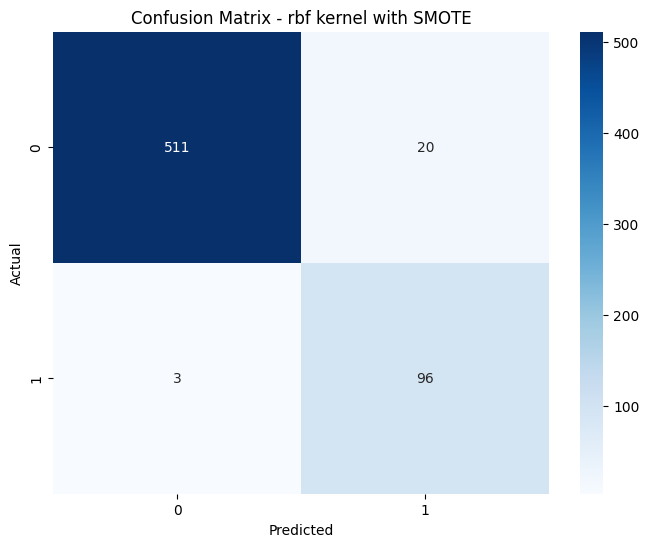


SVM with rbf kernel and Random Undersampling - Accuracy: 0.8968253968253969
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       531
           1       0.61      0.98      0.75        99

    accuracy                           0.90       630
   macro avg       0.80      0.93      0.84       630
weighted avg       0.93      0.90      0.91       630



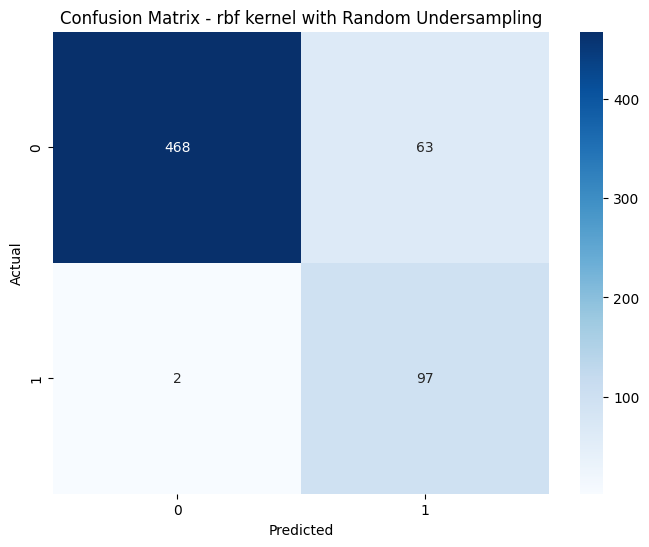


SVM with rbf kernel and SMOTEENN - Accuracy: 0.9253968253968254
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       531
           1       0.69      0.96      0.80        99

    accuracy                           0.93       630
   macro avg       0.84      0.94      0.88       630
weighted avg       0.94      0.93      0.93       630



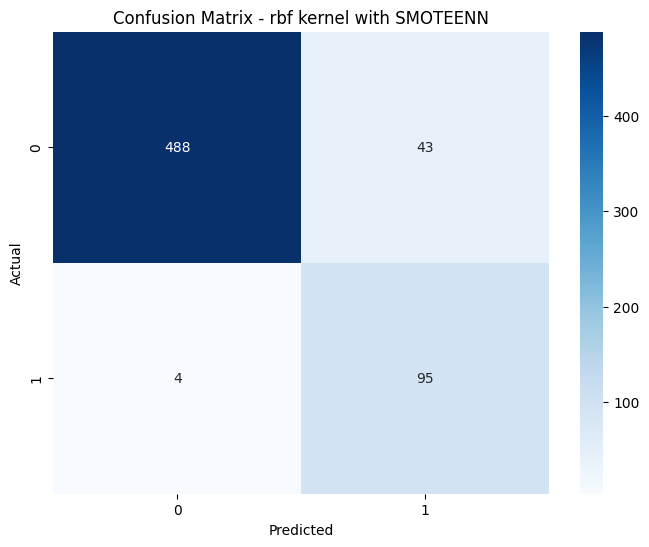


SVM with sigmoid kernel and SMOTE - Accuracy: 0.7523809523809524
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       531
           1       0.35      0.69      0.47        99

    accuracy                           0.75       630
   macro avg       0.64      0.73      0.65       630
weighted avg       0.84      0.75      0.78       630



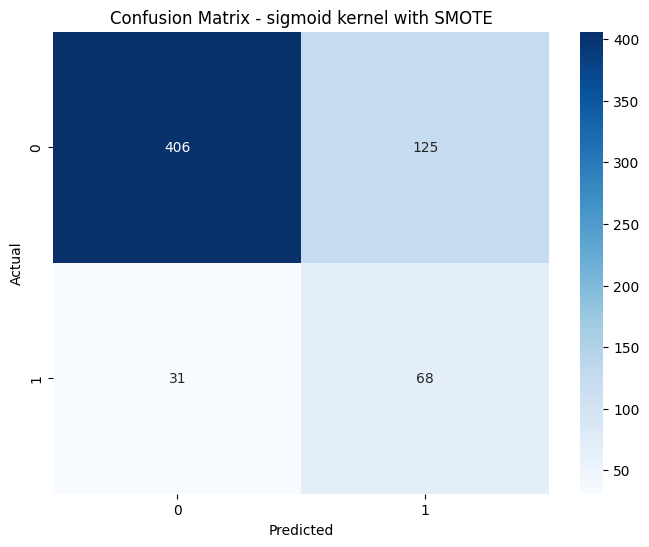


SVM with sigmoid kernel and Random Undersampling - Accuracy: 0.7396825396825397
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       531
           1       0.35      0.80      0.49        99

    accuracy                           0.74       630
   macro avg       0.65      0.76      0.66       630
weighted avg       0.86      0.74      0.77       630



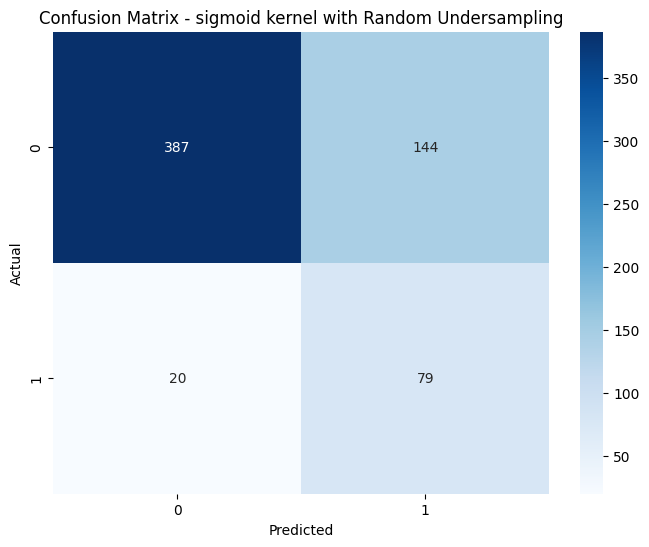


SVM with sigmoid kernel and SMOTEENN - Accuracy: 0.753968253968254
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       531
           1       0.36      0.76      0.49        99

    accuracy                           0.75       630
   macro avg       0.65      0.76      0.66       630
weighted avg       0.85      0.75      0.78       630



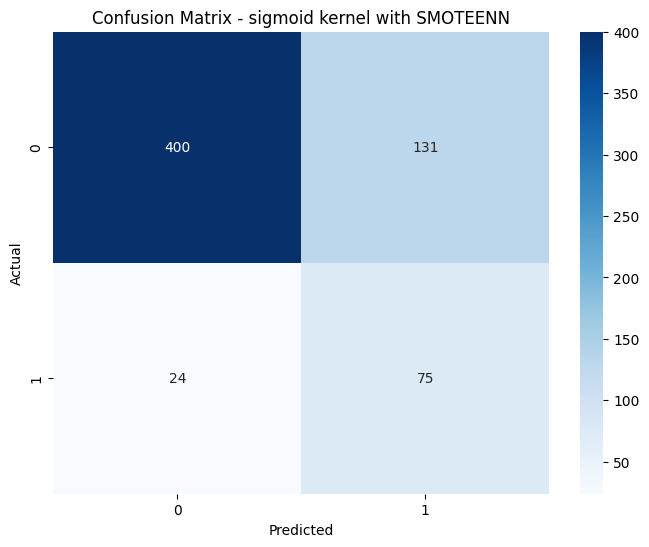

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns


# Define parameter grids for SVM kernels
param_grids = {
    'linear': {'svc__C': [1, 10]},
    'poly': {'svc__C': [1, 10], 'svc__degree': [2, 3], 'svc__gamma': ['scale']},
    'rbf': {'svc__C': [1, 10], 'svc__gamma': ['scale', 0.1]},
    'sigmoid': {'svc__C': [1, 10], 'svc__gamma': ['scale']}
}

# Define resampling methods
resampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

# Evaluate each kernel with different resampling methods
for kernel in param_grids:
    for resampling_name, resampler in resampling_methods.items():
        pipe = make_imb_pipeline(resampler, StandardScaler(), SVC(kernel=kernel, class_weight='balanced', probability=True))
        clf = GridSearchCV(pipe, param_grids[kernel], cv=3, scoring='accuracy', n_jobs=-1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"\nSVM with {kernel} kernel and {resampling_name} - Accuracy: {acc}")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix Visualization (optional, remove if not needed)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix - {kernel} kernel with {resampling_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, KBinsDiscretizer, FunctionTransformer
)
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import scorecardpy as sc
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)


dataset = pd.read_csv('Customer_Churn_Modified.csv')


target_variable = dataset.columns[-1]
features = dataset.columns[:-1]


X = dataset[features]
y = dataset[target_variable]


resampling_methods = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42)
}


transformations = {
    "Log Transformation": FunctionTransformer(np.log1p, validate=True), 
    "Rank Transformation": FunctionTransformer(
        lambda x: pd.DataFrame(x, columns=X.columns).rank(axis=0).to_numpy(), validate=True
    ),
    "Box-Cox Transformation": PowerTransformer(method='box-cox'),
    "Z-score Standardization": StandardScaler(),
    "Discretization": KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'),
    "WOE Transformation": "woe",  
}


if (X <= 0).any().any():
    print("Skipping Box-Cox Transformation due to non-positive values in the dataset.")
    del transformations["Box-Cox Transformation"]

# Initialize SVM kernels
svm_kernels = {
    "Linear Kernel": SVC(kernel="linear", random_state=42),
    "Polynomial Kernel": SVC(kernel="poly", degree=3, random_state=42),
    "RBF Kernel": SVC(kernel="rbf", random_state=42),
    "Sigmoid Kernel": SVC(kernel="sigmoid", random_state=42)
}


results = []

def apply_transformation(transformer, X_train, X_test, y_train=None):
    if transformer == "woe":
        bins = sc.woebin(pd.concat([X_train, y_train], axis=1), y=target_variable)
        X_train_transformed = sc.woebin_ply(X_train, bins)
        X_test_transformed = sc.woebin_ply(X_test, bins)
    else:
        transformer.fit(X_train)
        X_train_transformed = transformer.transform(X_train)
        X_test_transformed = transformer.transform(X_test)
    return X_train_transformed, X_test_transformed

for kernel_name, model in svm_kernels.items():
    for resample_name, resampler in resampling_methods.items():
        for transformation_name, transformer in transformations.items():
            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Apply resampling
            if resampler:
                X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            else:
                X_train_resampled, y_train_resampled = X_train, y_train
            
            # Apply transformation
            try:
                X_train_transformed, X_test_transformed = apply_transformation(
                    transformer, X_train_resampled, X_test, y_train_resampled
                )
            except Exception as e:
                print(f"Skipping {transformation_name} for {kernel_name} with {resample_name} due to: {e}")
                continue

            # Train and evaluate the model
            try:
                model.fit(X_train_transformed, y_train_resampled)
                y_pred = model.predict(X_test_transformed)
                accuracy = accuracy_score(y_test, y_pred)

                # Store results
                results.append({
                    "Model": "SVM",
                    "Kernel": kernel_name,
                    "Resampling": resample_name,
                    "Transformation": transformation_name,
                    "Accuracy": accuracy
                })
            except ValueError as e:
                print(f"Error during model training for {kernel_name} with {resample_name} and {transformation_name}: {e}")
                continue


results_df = pd.DataFrame(results)


excel_filename = "SVM_Results.xlsx"
results_df.to_excel(excel_filename, index=False)
print(f"\nResults saved to {excel_filename}")


print("\nSummary of SVM Evaluation:")
print(results_df.sort_values(by=["Accuracy"], ascending=False))


Skipping Box-Cox Transformation due to non-positive values in the dataset.
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] creating woe binning ...
[INFO] converting into woe va

Starting Grid Search with multiple metrics...
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Grid Search Complete.

ALL CROSS-VALIDATION RESULTS (Sorted by mean_test_accuracy):

                                                                       params  mean_test_accuracy  std_test_accuracy  rank_test_accuracy  mean_test_precision  std_test_precision  rank_test_precision  mean_test_recall  std_test_recall  rank_test_recall  mean_test_f1  std_test_f1  rank_test_f1
                     {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}            0.966270           0.003765                   1             0.941852            0.007154                    2          0.929673         0.013614                 2      0.935400     0.007563             1
      {'svm__C': 1, 'svm__degree': 3, 'svm__gamma': 1, 'svm__kernel': 'poly'}            0.961111           0.007381                   2             0.920707            0.014680                   21          0.935887     

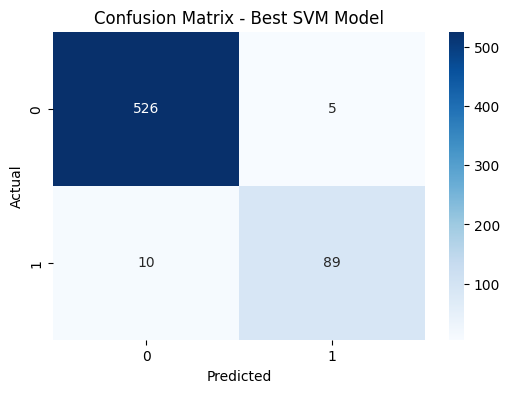

In [9]:


def main():
    df = pd.read_csv('Customer_Churn_Modified.csv')

    target_col = 'Churn'  
    X = df.drop(target_col, axis=1)
    y = df[target_col]

  
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )

   
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC())
    ])

    # Parameter Grid
    param_grid = [
        # 1) Linear kernel
        {
            'svm__kernel': ['linear'],
            'svm__C': [0.1, 1, 10, 100],
        },
        # 2) RBF kernel
        {
            'svm__kernel': ['rbf'],
            'svm__C': [0.1, 1, 10, 100],
            'svm__gamma': [0.001, 0.01, 0.1, 1],
        },
        # 3) Polynomial kernel
        {
            'svm__kernel': ['poly'],
            'svm__C': [0.1, 1, 10, 100],
            'svm__degree': [2, 3, 4],
            'svm__gamma': [0.001, 0.01, 0.1, 1],
        },
        # 4) Sigmoid kernel
        {
            'svm__kernel': ['sigmoid'],
            'svm__C': [0.1, 1, 10, 100],
            'svm__gamma': [0.001, 0.01, 0.1, 1],
        }
    ]


    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=scoring,      
        refit='accuracy',     
        cv=5,                 
        n_jobs=-1,            
        verbose=1
    )

    print("Starting Grid Search with multiple metrics...")
    grid_search.fit(X_train, y_train)
    print("Grid Search Complete.\n")

  
    results_df = pd.DataFrame(grid_search.cv_results_)

    cols_of_interest = [
        'params',
        'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
        'mean_test_precision', 'std_test_precision', 'rank_test_precision',
        'mean_test_recall', 'std_test_recall', 'rank_test_recall',
        'mean_test_f1', 'std_test_f1', 'rank_test_f1'
    ]

    for col in cols_of_interest[:]:  
        if col not in results_df.columns:
            cols_of_interest.remove(col)

   
    sorted_results_df = results_df[cols_of_interest].sort_values(
        by='mean_test_accuracy',
        ascending=False
    )

    print("ALL CROSS-VALIDATION RESULTS (Sorted by mean_test_accuracy):\n")
    print(sorted_results_df.to_string(index=False), "\n")


    sorted_results_df.to_excel("SVM_GridSearch_Results.xlsx", index=False)
    print("Results saved to 'SVM_GridSearch_Results.xlsx'.\n")

   
    print("BEST PARAMETERS (from cross-validation):", grid_search.best_params_)
    print("BEST CV ACCURACY:", grid_search.best_score_, "\n")


    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    print("TEST ACCURACY (Best Model):", test_accuracy, "\n")

    print("CONFUSION MATRIX (Best Model):")
    print(confusion_matrix(y_test, y_pred), "\n")

    print("CLASSIFICATION REPORT (Best Model):")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    plt.title("Confusion Matrix - Best SVM Model")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

if __name__ == "__main__":
    main()
